# Test countries analysis: Mauritius

These notebooks apply the harmonizer model to each of the shapefiles provided in the `roifiles/` sub-directory:
- Contiguous US ("CONUS") 
- Germany 
- Spain 
- France 
- Italy 
- Japan 
- Mauritius **featured in this notebook**
- Nicaragua
- Puerto Rico
- El Salvador
- Uganda

As a prerequisite to executing this analyis the harmonizer must be run to get the outputs. This can be done for all countries in the test folder at once. To run, simply to go command line (at root level of this repo) and enter:

`$ python -m harmonizer.main -a`

It will take ~40 min (2-3 minutes for each country, except the US which takes 20+).

Results for all will be in the `outputs/<country_shapefile_name>` and `results/<country_shapefile_name>` sub-directories.

In [2]:
from IPython.display import Image, Video
from harmonizer.diagnostics import *
from harmonizer.config import DMSP_CLIP, VIIRS_CLIP
from harmonizer.plots import difference_plots
import seaborn as sns
import matplotlib.pyplot as plt

## Mauritius time lapse raw vs harmonized

A time lapse video of nighttimme lights from 1992 - present (DMSP-OLS until 2013, then VIIRS-DNB).

In [3]:
results_dir = "gadm36_MUS_0"
Video(f"../results/{results_dir}/raw.mp4",width=700)

The fluctuations in DMSP are visible and the shift to VIIRS-DNB (which is measured in completely different units) is so abrupt that the image goes dark.

Due to small islands extending beyind the main island, this ROI is contains a large relative amount of ocean (the lower left corner has the interesting stuff).

Here's the time lapse after the harmonization:

In [4]:
Video(f"../results/{results_dir}/final.mp4",width=700)

DMSP-OLS fluctuations remain although they're dampened, but the VIIRS-DNB is coherent.

## Analysis of 2013 annual composite where DMSP-OLS and VIIRS-DNB overlap (used for training)

### Visual comparison

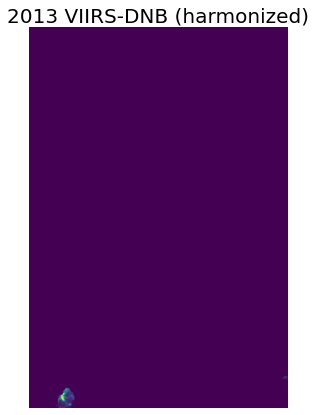

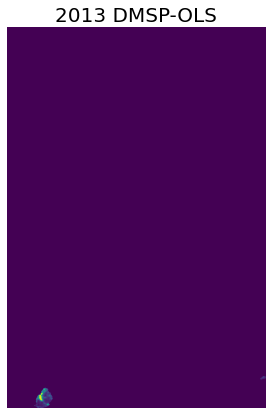

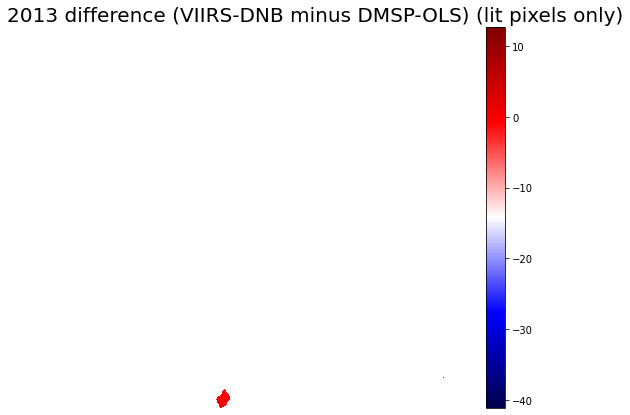

In [5]:
difference_plots(Path(Path.cwd().parent, "results", results_dir, "2013_comparison_raster.tif"))

Mauritius, a very small land area, shows a fairly uniform level of diffence (that is near zero) for VIIRS and DMSP. 


### Histogram of 2013 DMSP-OLS and VIIRS-DNB for Mauritius

![hist](../results/gadm36_MUS_0/2013hist.png)

The histogram is not as smooth as other countries (given the small sample size) but still shows a decent alignment in distribution of VIIRS after harmonization (blue) and DMSP (red). The Anderson-Darling non-paramentric test of variance in distribution failed to reject the null (that these are drawn from the same population) -- i.e. no evidence that these samples vary significantly. Curiously the DMSP-OLS calibration process coerced data such that no digital number fell in a few values (18, 34, 48).

#### Scattepot of 2013 VIIRS-DNB (after harmonization) and DMSP-OLS for Mauritius

![scatter](../results/gadm36_MUS_0/2013scatter.png)

Scatter shows a very strong linear alignment of VIIRS-DNB (after harmonization) and DMSP-OLS. A low RMSD (~3) and high Spearman R (0.93) indicate that this harmonized dataset is very closely aligned.

## Time series of annual composites (1992-2020) after harmonization
In all plots, pixels with a "digital number" of less than 3 have been masked.

### Mean radiance per pixel (DMSP-OLS-like "digital number")

![ts mean](../results/gadm36_MUS_0/harmonized_ts_mean.png)

### Median radiance per pixel (DMSP-OLS-like "digital number")

![ts md](../results/gadm36_MUS_0/harmonized_ts_median.png)

### Sum of Lights (DMSP-OLS-like "digital number")

![ts mean](../results/gadm36_MUS_0/harmonized_ts_sum.png)

A notable peak in DMSP data in early 2000s...but could be an indication of econmic activity. The DMSP to VIIRS coherence is fairly strong.